[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/aprendizaje-automatico-dc-uba-ar/material/blob/main/notebooks/notebook_02_titanic-published.ipynb)

# Titanic

En este ejercicio, deberán descargar y explorar el contenido de la base de datos en formato CSV (valores separados por comas) que contiene datos de pasajeros del naufragio del transatlántico Titanic en 1912, incluyendo edad, sexo, clase del pasaje y supervivencia a la tragedia, entre otros.

Completar el notebook de manera de clasificar a los pasajeros en supervivientes y no supervivientes
tan bien como sea posible.

Atención, en este momento de la materia no está permitido usar ninguna técnica de Aprendizaje Automático.
El objetivo es conseguir un buen porcentaje de aciertos sobre estos datos.


## Antes de empezar

Preparamos algunas funciones auxiliares para trabajar:

1. `cargar_datos`: lee el csv con los datos
1. `predict`: dado un conjunto de datos, devuelve la predicción para cada instancia
1. `accuracy`: métrica sobre el desempeño de una predicción definida como:

  $$accuracy = \frac{\#aciertos}{\#predicciones}$$
        
  Su interpretación puede ser:  en cuántos casos acerté.
        

In [ ]:
from IPython.display import display
import pandas as pd
from typing import Tuple

def cargar_datos() -> Tuple[pd.DataFrame, pd.Series]:
    """
    Carga los datos del Titanic desde un archivo CSV y devuelve las características (X) y las etiquetas (y).

    Returns:
        X (pd.DataFrame): Características del dataset, excluyendo la columna "Survived" y "PassengerId".
        y (pd.Series): Etiquetas del dataset, correspondientes a la columna "Survived".
    """
    df = pd.read_csv(
        "https://github.com/aprendizaje-automatico-dc-uba-ar/material/raw/main/datasets/data_02/titanic.csv"
    )
    X = df.drop("Survived", axis=1).drop("PassengerId", axis=1)
    y = df.Survived
    return X, y


def predict(X: pd.DataFrame) -> list:
    """
    Predice la salida para cada fila de los datos. Debe definirse primero la función predict_instance para utilizarla
    """
    y_predicted = []
    for x in X.itertuples():
        try:
            y_i = predict_instance(x)
        except NameError:
            raise NameError("Por favor definir la función predict_instance")
        y_predicted.append(y_i)
    return y_predicted


def accuracy(y_predicted: list, y_real: list) -> float:
    """
    Calcula el accuracy entre un y_predicted y un y_real.
    """
    TP_TN = sum([y_i == y_j for (y_i, y_j) in zip(y_predicted, y_real)])
    P_N = len(y_real)
    return TP_TN / P_N

## Ejercicio

Antes de empezar cargamos los datos y los separamos en `X` (dataframe de instancias con atributos que usaremos como columnas y datos como filas), `y` (vector de clases a las que corresponde cada instancia).

Definición de los datos:

Variable|Definición|Interpretación de valores
--------|--------|--------
survival|Sobreviviente|0 = No, 1 = Sí
pclass|Clase de pasaje|1 = 1era, 2 = 2da, 3 = 3era
sex|Sexo|
Age|Edad en años|
sibsp|# hermanos/as/ esposos/as a bordo|
parch|# padres / hijos a bordo|
ticket|Número de Ticket|
fare|Tarifa|
cabin|Número de cabina|
embarked|Puerto de embarque|C = Cherbourg<br>Q = Queenstown<br>S = Southampton


Una recomendación, para este ejercicio y para todos los ejercicios, antes de comenzar el ejercicio explorar los datos para ver qué forma/característica tiene y ganar intuición sobre el dominio en el que se va a trabajar.

Entre muchas cosas, se puede:

  - Inspeccione y verifique el tipo de dato del dataframe. Calcule medidas resumen para las distintas columnas
  - Graficar distintos atributos y observar su distribución (Ej. la edad: ¿son más jóvenes? ¿O más viejos? ¿O un poco y un poco?).
  - Graficar relaciones entre atributos y relaciones entre atributos y la salida (si sobrevivió o no). Ver opciones de `seaborn` sugeridas en el notebook anterior.
  

***Obs.*** Recuerde importar las librerías necesarias como `Matplotlib` o `Seaborn`.


In [ ]:
X, y = cargar_datos()

In [ ]:
X

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.5500,NaN,C
1,3,"Rintamaki, Mr. Matti",male,35.0,0,0,STON/O 2. 3101273,7.1250,NaN,S
2,2,"Butler, Mr. Reginald Fenton",male,25.0,0,0,234686,13.0000,NaN,S
3,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.0500,NaN,S
4,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
796,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9000,NaN,S
797,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C
798,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S
799,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C


In [ ]:
y

,Survived
0,1
1,0
2,0
3,0
4,1
...,...
796,0
797,1
798,0
799,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
indices_vivos = (y == 1)
indices_muertos = (y == 0)

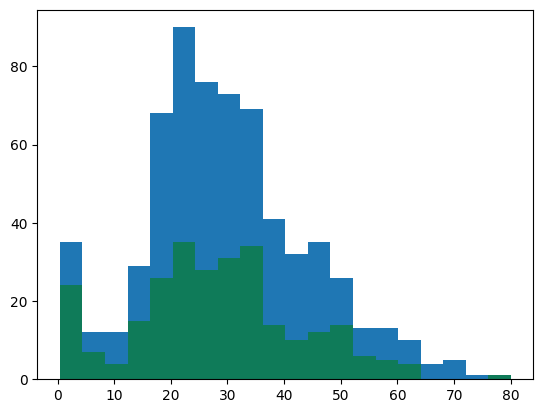

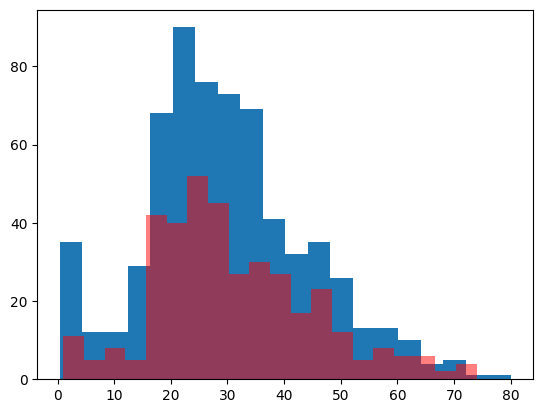

In [ ]:
plt.hist(X.Age, bins=20)
plt.hist(X[indices_vivos].Age,bins=20,color="green",alpha=0.5)
plt.show()
plt.hist(X.Age, bins=20)
plt.hist(X[indices_muertos].Age,bins=20,color="red",alpha=0.5)
plt.show()

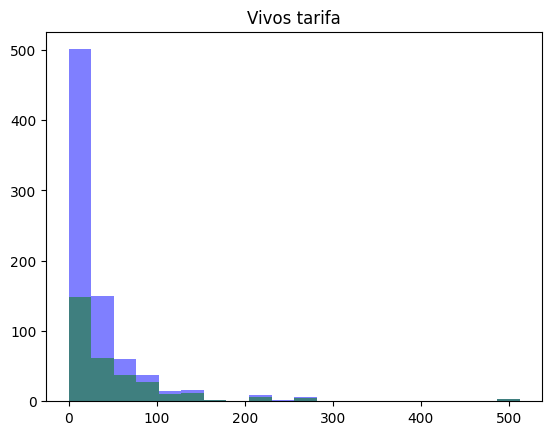

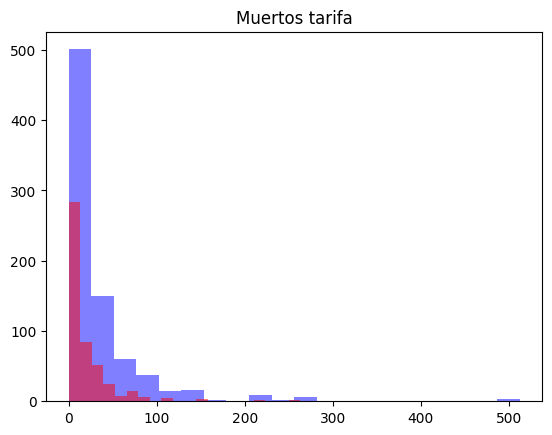

In [ ]:
plt.hist(X.Fare, bins=20, color="blue", alpha=0.5)
plt.hist(X[indices_vivos].Fare, bins=20, color="green", alpha=0.5)
plt.title("Vivos tarifa")
plt.show()

plt.hist(X.Fare, bins=20, color="blue", alpha=0.5)
plt.hist(X[indices_muertos].Fare, bins=20, color="red", alpha=0.5)
plt.title("Muertos tarifa")
plt.show()

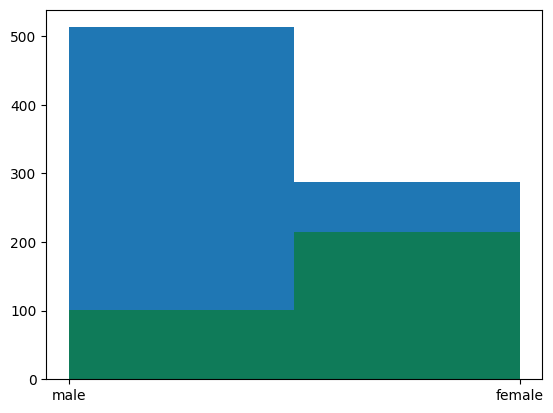

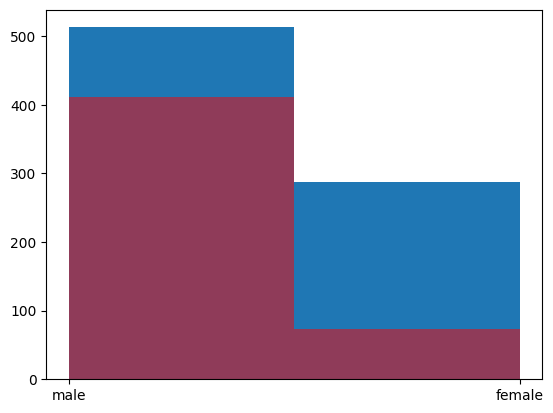

In [ ]:
plt.hist(X.Sex, bins=2)
plt.hist(X.Sex[indices_vivos], bins=2,color="green", alpha=0.5)
plt.show()
plt.hist(X.Sex, bins=2)
plt.hist(X.Sex[indices_muertos], bins=2, color="red", alpha=0.5)
plt.show()

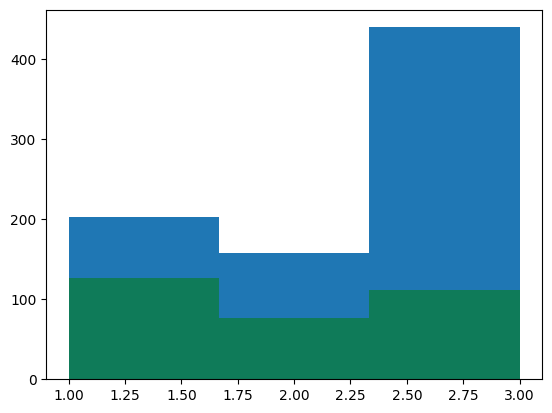

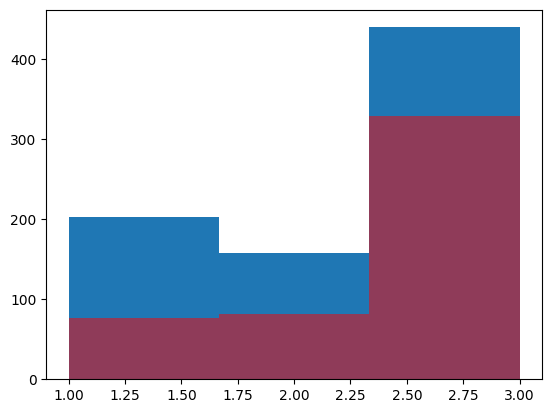

In [ ]:
plt.hist(X.Pclass, bins=3)
plt.hist(X.Pclass[indices_vivos], bins=3,color="green", alpha=0.5)
plt.show()
plt.hist(X.Pclass, bins=3)
plt.hist(X.Pclass[indices_muertos], bins=3, color="red", alpha=0.5)
plt.show()

Ahora dividamos por clase y recalculemos para cada una:

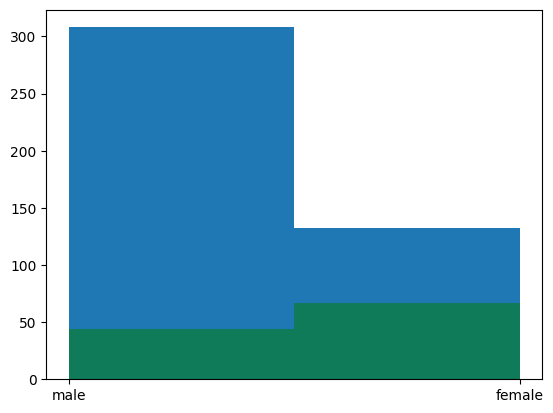

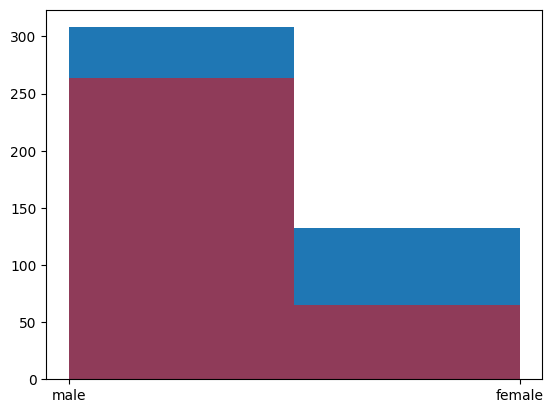

In [ ]:
#Clase 3
plt.hist(X[(X["Pclass"] == 3)].Sex, bins=2)
plt.hist(X[(X["Pclass"] == 3) & indices_vivos].Sex, bins=2,color="green", alpha=0.5)
plt.show()
plt.hist(X[(X["Pclass"] == 3)].Sex, bins=2)
plt.hist(X[(X["Pclass"] == 3) & indices_muertos].Sex, bins=2, color="red", alpha=0.5)
plt.show()

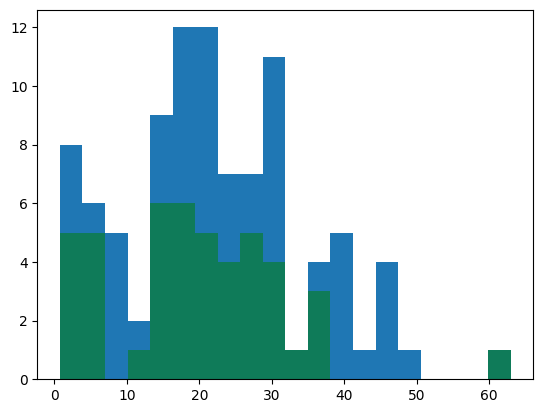

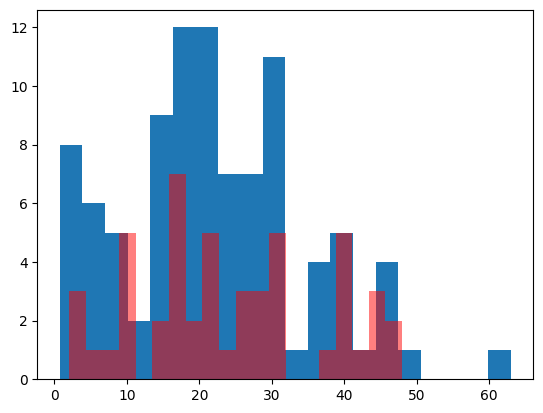

In [ ]:
#Clase 3, por edad PARA MUJERES
plt.hist(X[(X["Pclass"] == 3) & (X['Sex']=="female")].Age, bins=20)
plt.hist(X[(X["Pclass"] == 3) & (X['Sex']=="female") & indices_vivos].Age, bins=20,color="green", alpha=0.5)
plt.show()
plt.hist(X[(X["Pclass"] == 3) & (X['Sex']=="female")].Age, bins=20)
plt.hist(X[(X["Pclass"] == 3) & (X['Sex']=="female") & indices_muertos].Age, bins=20, color="red", alpha=0.5)
plt.show()

Veamos si podemos diferenciarlas un poco mas

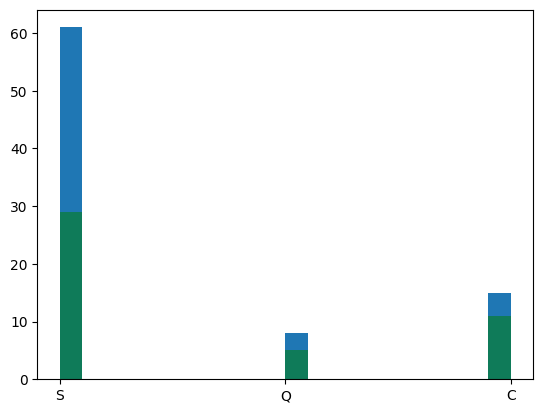

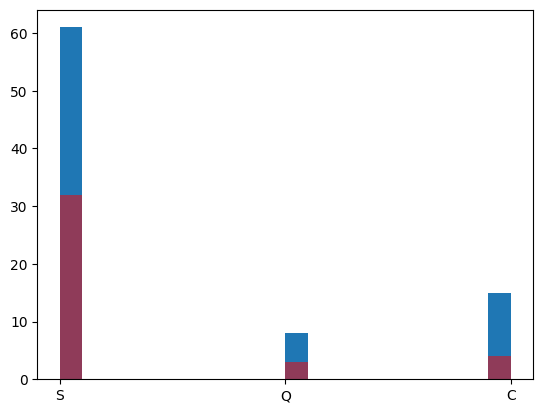

In [ ]:
#Clase 3, por edad PARA MUJERES
plt.hist(X[(X["Pclass"] == 3) & (X['Age']<39) & (X['Sex']=="female")].Embarked, bins=20)
plt.hist(X[(X["Pclass"] == 3) & (X['Age']<39) & (X['Sex']=="female") & indices_vivos].Embarked, bins=20,color="green", alpha=0.5)
plt.show()
plt.hist(X[(X["Pclass"] == 3) & (X['Age']<39) & (X['Sex']=="female")].Embarked, bins=20)
plt.hist(X[(X["Pclass"] == 3) & (X['Age']<39) & (X['Sex']=="female") & indices_muertos].Embarked, bins=20, color="red", alpha=0.5)
plt.show()

Veamos para las mujeres embarcadas en S que podemos diferenciar

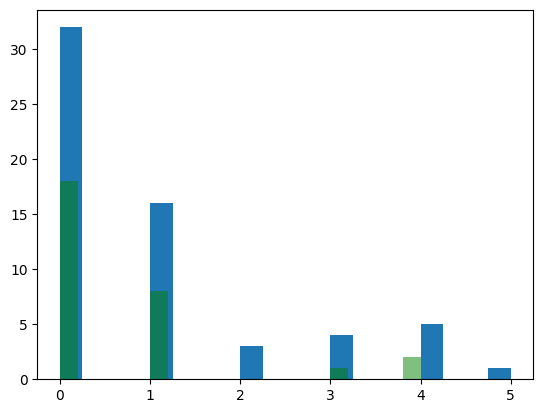

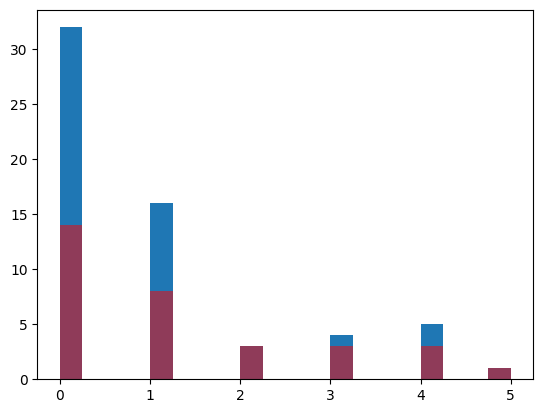

In [ ]:
#Clase 3, por edad PARA MUJERES
plt.hist(X[(X["Pclass"] == 3) & (X['Embarked']=="S") & (X['Age']<39) & (X['Sex']=="female")].SibSp, bins=20)
plt.hist(X[(X["Pclass"] == 3) & (X['Embarked']=="S") & (X['Age']<39) & (X['Sex']=="female") & indices_vivos].SibSp, bins=20,color="green", alpha=0.5)
plt.show()
plt.hist(X[(X["Pclass"] == 3) & (X['Embarked']=="S") & (X['Age']<39) & (X['Sex']=="female")].SibSp, bins=20)
plt.hist(X[(X["Pclass"] == 3) & (X['Embarked']=="S") & (X['Age']<39) & (X['Sex']=="female") & indices_muertos].SibSp, bins=20, color="red", alpha=0.5)
plt.show()

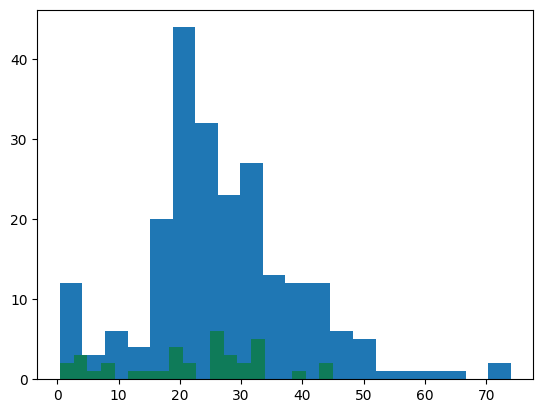

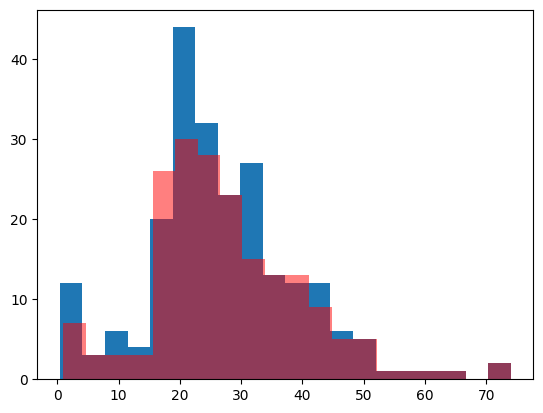

In [ ]:
#Clase 3, por edad PARA VARONES
plt.hist(X[(X["Pclass"] == 3) & (X['Sex']=="male")].Age, bins=20)
plt.hist(X[(X["Pclass"] == 3) & (X['Sex']=="male") & indices_vivos].Age, bins=20,color="green", alpha=0.5)
plt.show()
plt.hist(X[(X["Pclass"] == 3) & (X['Sex']=="male")].Age, bins=20)
plt.hist(X[(X["Pclass"] == 3) & (X['Sex']=="male") & indices_muertos].Age, bins=20, color="red", alpha=0.5)
plt.show()

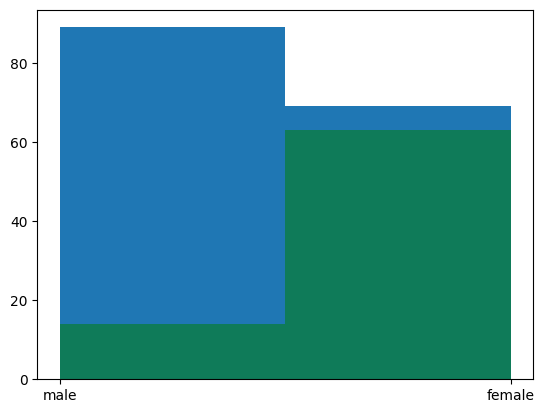

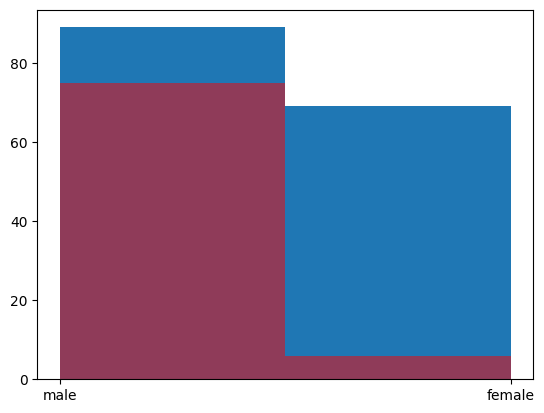

In [ ]:
#Clase 2
plt.hist(X[(X["Pclass"] == 2)].Sex, bins=2)
plt.hist(X[(X["Pclass"] == 2) & indices_vivos].Sex, bins=2,color="green", alpha=0.5)
plt.show()
plt.hist(X[(X["Pclass"] == 2)].Sex, bins=2)
plt.hist(X[(X["Pclass"] == 2) & indices_muertos].Sex, bins=2, color="red", alpha=0.5)
plt.show()

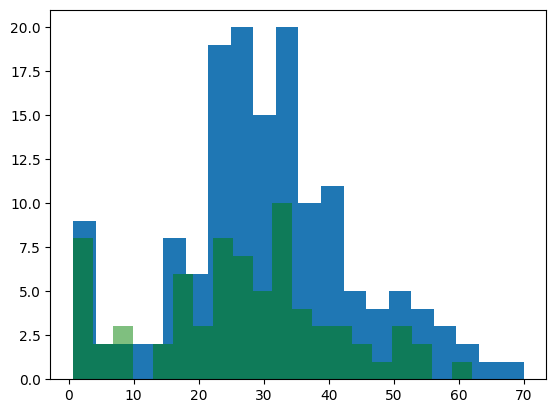

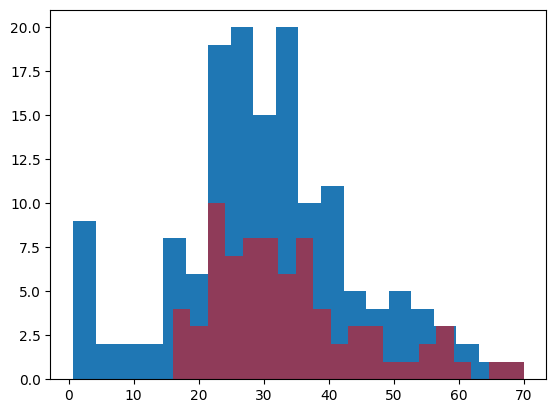

In [ ]:
#Clase 2, por edad
plt.hist(X[(X["Pclass"] == 2)].Age, bins=20)
plt.hist(X[(X["Pclass"] == 2) & indices_vivos].Age, bins=20,color="green", alpha=0.5)
plt.show()
plt.hist(X[(X["Pclass"] == 2)].Age, bins=20)
plt.hist(X[(X["Pclass"] == 2) & indices_muertos].Age, bins=20, color="red", alpha=0.5)
plt.show()

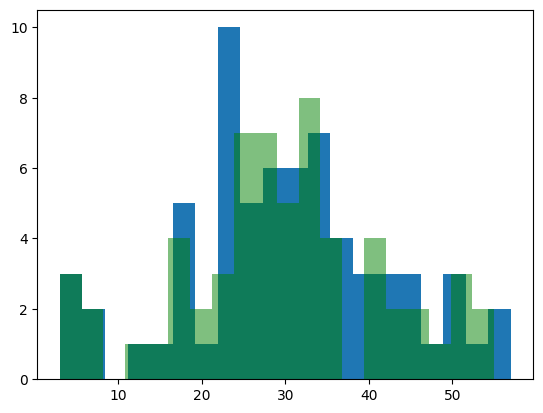

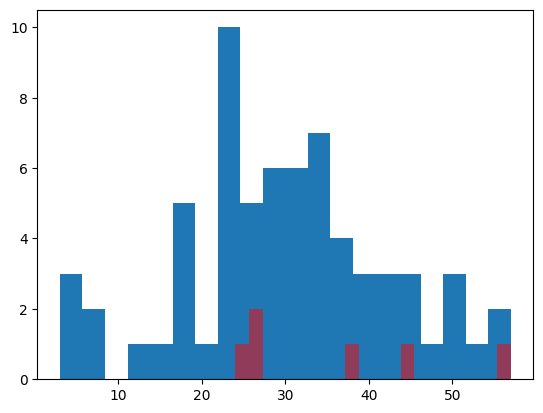

In [ ]:
#Clase 2, por edad PARA MUJERES
plt.hist(X[(X["Pclass"] == 2) & (X['Sex']=="female")].Age, bins=20)
plt.hist(X[(X["Pclass"] == 2) & (X['Sex']=="female") & indices_vivos].Age, bins=20,color="green", alpha=0.5)
plt.show()
plt.hist(X[(X["Pclass"] == 2) & (X['Sex']=="female")].Age, bins=20)
plt.hist(X[(X["Pclass"] == 2) & (X['Sex']=="female") & indices_muertos].Age, bins=20, color="red", alpha=0.5)
plt.show()

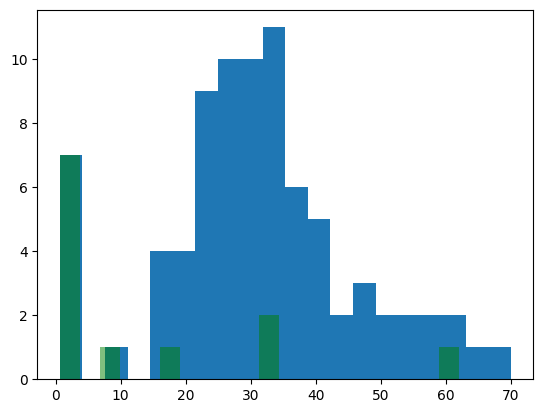

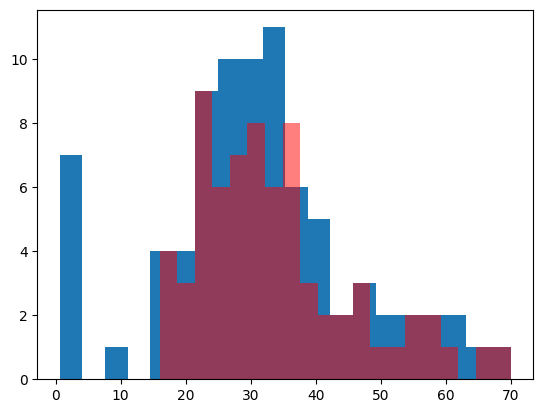

In [ ]:
#Clase 2, por edad PARA VARONES
plt.hist(X[(X["Pclass"] == 2) & (X['Sex']=="male")].Age, bins=20)
plt.hist(X[(X["Pclass"] == 2) & (X['Sex']=="male") & indices_vivos].Age, bins=20,color="green", alpha=0.5)
plt.show()
plt.hist(X[(X["Pclass"] == 2) & (X['Sex']=="male")].Age, bins=20)
plt.hist(X[(X["Pclass"] == 2) & (X['Sex']=="male") & indices_muertos].Age, bins=20, color="red", alpha=0.5)
plt.show()

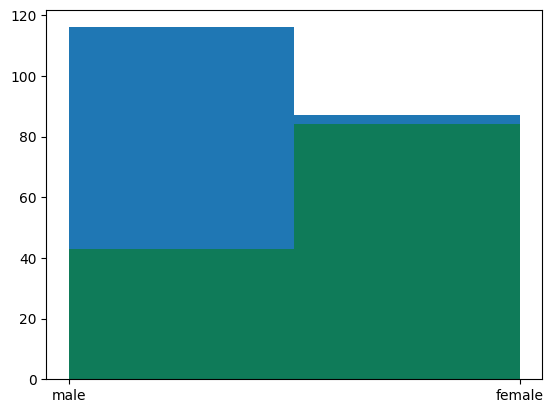

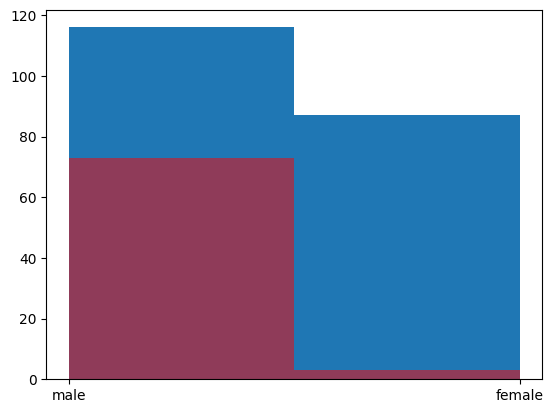

In [ ]:
#Clase 1
plt.hist(X[(X["Pclass"] == 1)].Sex, bins=2)
plt.hist(X[(X["Pclass"] == 1) & indices_vivos].Sex, bins=2,color="green", alpha=0.5)
plt.show()
plt.hist(X[(X["Pclass"] == 1)].Sex, bins=2)
plt.hist(X[(X["Pclass"] == 1) & indices_muertos].Sex, bins=2, color="red", alpha=0.5)
plt.show()

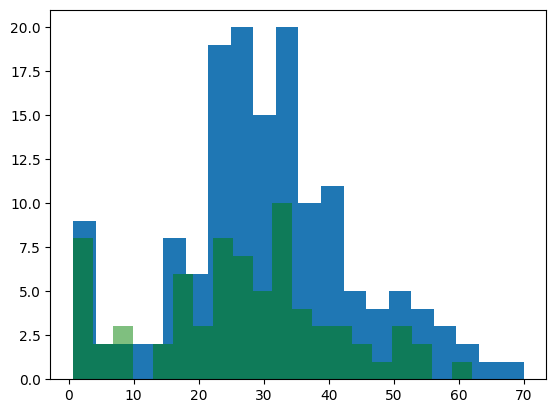

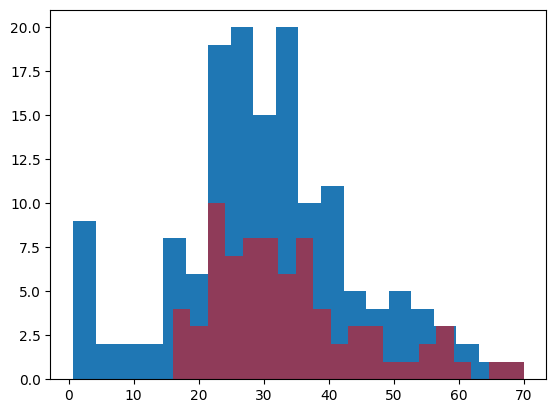

In [ ]:
#Clase 1, por edad
plt.hist(X[(X["Pclass"] == 2)].Age, bins=20)
plt.hist(X[(X["Pclass"] == 2) & indices_vivos].Age, bins=20,color="green", alpha=0.5)
plt.show()
plt.hist(X[(X["Pclass"] == 2)].Age, bins=20)
plt.hist(X[(X["Pclass"] == 2) & indices_muertos].Age, bins=20, color="red", alpha=0.5)
plt.show()

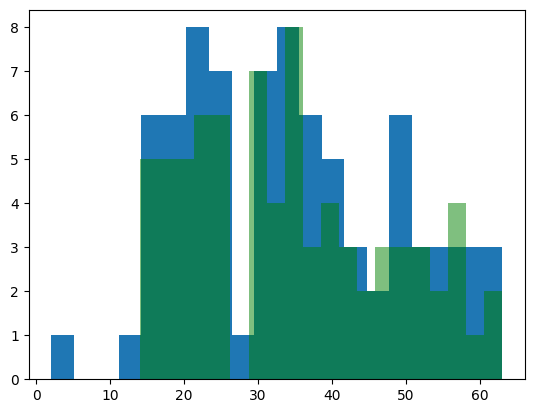

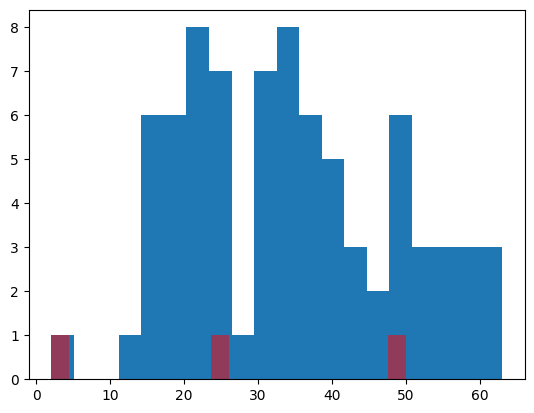

In [ ]:
#Clase 1, por edad PARA MUJERES
plt.hist(X[(X["Pclass"] == 1) & (X['Sex']=="female")].Age, bins=20)
plt.hist(X[(X["Pclass"] == 1) & (X['Sex']=="female") & indices_vivos].Age, bins=20,color="green", alpha=0.5)
plt.show()
plt.hist(X[(X["Pclass"] == 1) & (X['Sex']=="female")].Age, bins=20)
plt.hist(X[(X["Pclass"] == 1) & (X['Sex']=="female") & indices_muertos].Age, bins=20, color="red", alpha=0.5)
plt.show()

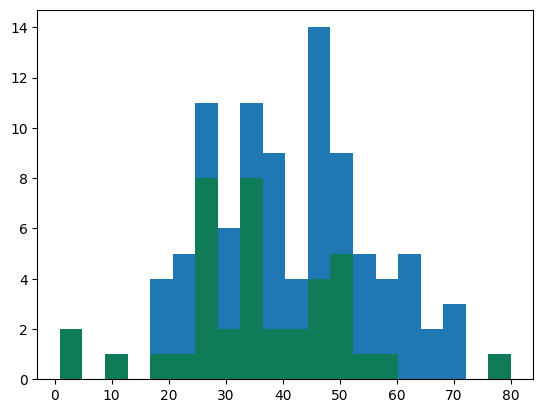

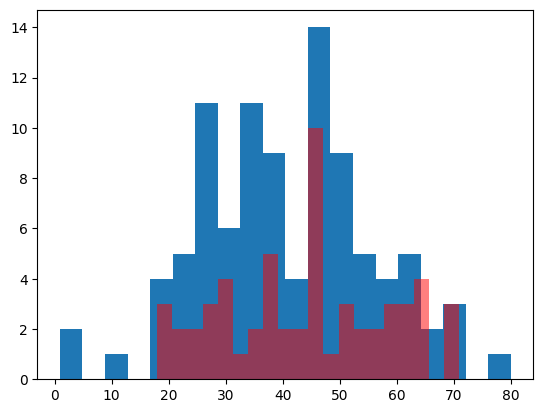

In [ ]:
#Clase 1, por edad PARA VARONES
plt.hist(X[(X["Pclass"] == 1) & (X['Sex']=="male")].Age, bins=20)
plt.hist(X[(X["Pclass"] == 1) & (X['Sex']=="male") & indices_vivos].Age, bins=20,color="green", alpha=0.5)
plt.show()
plt.hist(X[(X["Pclass"] == 1) & (X['Sex']=="male")].Age, bins=20)
plt.hist(X[(X["Pclass"] == 1) & (X['Sex']=="male") & indices_muertos].Age, bins=20, color="red", alpha=0.5)
plt.show()

para los varones de clase 1 no queda del todo claro: distingamos por tarifa (Fare)

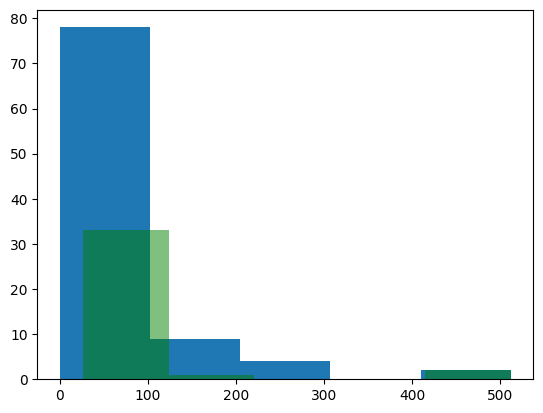

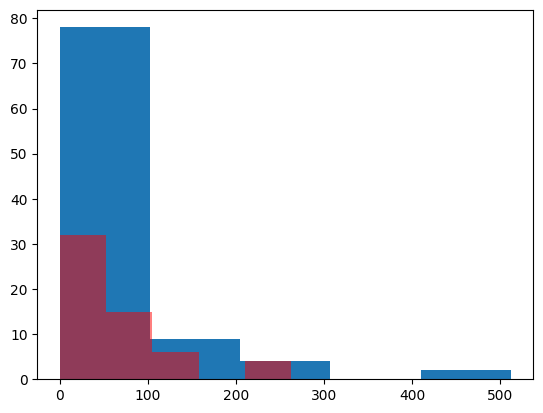

In [ ]:
#Clase 1, por tarifa PARA VARONES
plt.hist(X[(X["Pclass"] == 1) & (X['Age']>15) & (X['Sex']=="male")].Fare, bins=5)
plt.hist(X[(X["Pclass"] == 1) & (X['Age']>15) & (X['Sex']=="male") & indices_vivos].Fare, bins=5,color="green", alpha=0.5)
plt.show()
plt.hist(X[(X["Pclass"] == 1) & (X['Age']>15) & (X['Sex']=="male")].Fare, bins=5)
plt.hist(X[(X["Pclass"] == 1) & (X['Age']>15) & (X['Sex']=="male") & indices_muertos].Fare, bins=5, color="red", alpha=0.5)
plt.show()

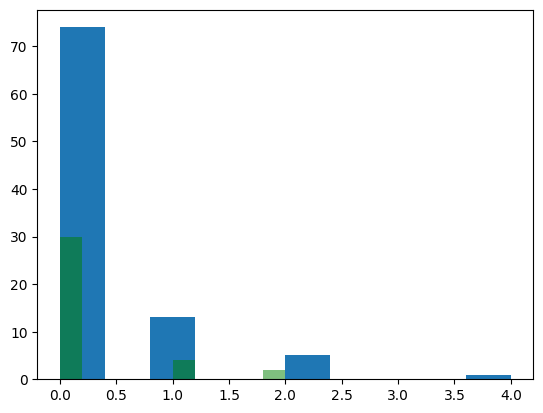

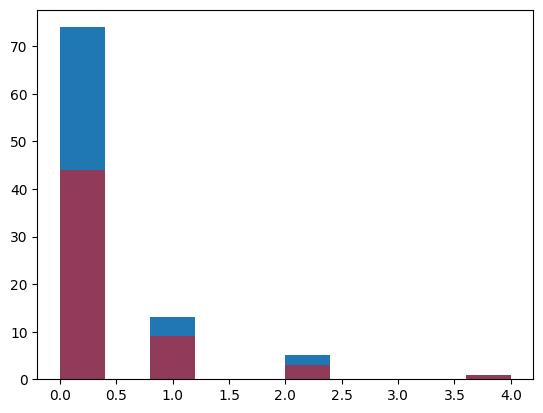

In [ ]:
#Clase 1, por parch PARA VARONES
plt.hist(X[(X["Pclass"] == 1) & (X['Age']>15) & (X['Sex']=="male")].Parch, bins=10)
plt.hist(X[(X["Pclass"] == 1) & (X['Age']>15) & (X['Sex']=="male") & indices_vivos].Parch, bins=10,color="green", alpha=0.5)
plt.show()
plt.hist(X[(X["Pclass"] == 1) & (X['Age']>15) & (X['Sex']=="male")].Parch, bins=10)
plt.hist(X[(X["Pclass"] == 1) & (X['Age']>15) & (X['Sex']=="male") & indices_muertos].Parch, bins=10, color="red", alpha=0.5)
plt.show()

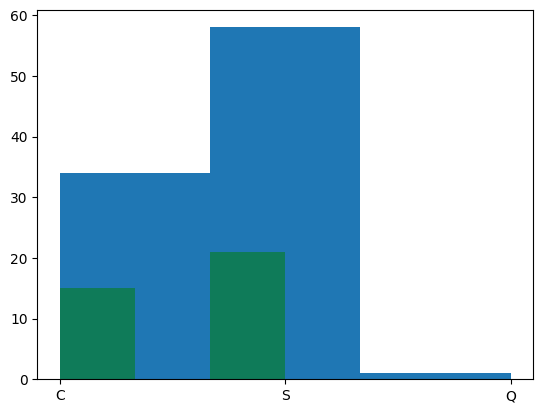

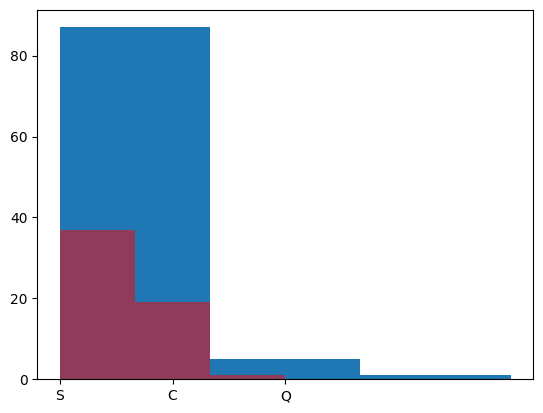

In [ ]:
#Clase 1, por Embarked PARA VARONES
plt.hist(X[(X["Pclass"] == 1) & (X['Age']>15) & (X['Sex']=="male")].Embarked, bins=3)
plt.hist(X[(X["Pclass"] == 1) & (X['Age']>15) & (X['Sex']=="male") & indices_vivos].Embarked, bins=3,color="green", alpha=0.5)
plt.show()
plt.hist(X[(X["Pclass"] == 1) & (X['Age']>15) & (X['Sex']=="male")].Parch, bins=3)
plt.hist(X[(X["Pclass"] == 1) & (X['Age']>15) & (X['Sex']=="male") & indices_muertos].Embarked, bins=3, color="red", alpha=0.5)
plt.show()

Ningun atributo parece diferenciarlos unequívocamente

A continuación se encuentra la primera definición de una función que predice. Esta tarea se resuelve devolviendo la etiqueta 0 o 1.

En este punto se puede usar la información disponible del dataframe que considere necesaria, pero para esta primer implementación, la solución planteada es trivial: sobrevivieron todas las personas.



In [ ]:
def predict_instance(x: pd.Series) -> int:
    """
    Predice la clase para instancia x.
    """
    prediction = 1  # CAMBIAR ESTA LINEA POR REGLAS

    return prediction

Evaluamos este clasificador:

In [ ]:
y_pred = predict(X)
# Completar el algoritmo para mejorar esta performance.

print(f"Accuracy: {round(accuracy(y_pred, y), 3)}")

Accuracy: 0.393


### Consigna

La tarea será escribir un algoritmo para predecir si sobrevivirá o no por instancia que obtenga el mejor valor de Accuracy.

Para hacerlo sólo está permitido utilizar en la predicción reglas que tomen datos de la instancia (sin entrenamiento previo).

Ej: `prediction = x.Sex=="female"`
o combinaciones más complejas con condicionales (if), pero que únicamente utilicen los atributos de la instancia presente (`if x.Sex=="female": prediction = (x.Age % 2 == 0)  else: prediction = 0`.

Como lo que tenemos es un `dataframe` de Pandas, podemos acceder a los atributos también así:
```
if x["Age"] > 10:
    return 1
else:
    ...
```

**No está permitido utilizar otras herramientas/técnicas en este punto.**

In [ ]:
def predict_instance(x: pd.Series):
    if x.Pclass == 3:
      if x.Age>=39:
        prediction = 0
      else:
        if x.Sex=="female":
          if x.Embarked=="C" or x.Embarked=="Q":
            prediction = 1
          else:
            if x.Parch==1 or x.Parch==5:
              prediction = 1
            else:
                prediction = 0
        else:
          prediction = 0
    elif x.Pclass == 2:
      if x.Age<20:
        prediction = 1
      else:
        if x.Sex=="female":
          prediction = 1
        else:
          prediction = 0
    else: #clase 1
      if x.Sex=="female":
        prediction = 1
      else:
        if x.Age<=15 or x.Age>75:
          prediction = 1
        else:
          if x.Fare>350:
            prediction = 1
          else:
            prediction = 0

    return prediction



In [ ]:
y_pred = predict(X)
# Completar el algoritmo para mejorar esta performance.

print(f"Accuracy: {round(accuracy(y_pred, y), 3)}")

Accuracy: 0.818


¡A armar nuevas funciones de predicción y mejorar el Accuracy!